<a href="https://colab.research.google.com/github/pragnareddy96/Battu_INFO5731_Spring2020/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [0]:

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [0]:
import random
text_data = []
with open('edited_tweets.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .100:
            print(tokens)
            text_data.append(tokens)

['tweet', 'classification']
['chasbottom', 'diseas', 'wuhancoronaviru', 'soooo', 'smoke', 'nrealli', 'nregard', 'state', 'admsmzbvzn', 'neutral']
['comrad', 'nycmayor', 'chinaviru', 'wuhancoronaviru', 'china', 'period', 'offend', 'kyvqhrvhc', 'positive']
['richzeoli', 'appar', 'favorit', 'store', 'affect', 'wuhancoronaviru', 'zfeuvegi', 'positive']
['philprang', 'sharron', 'royalti', 'stormisuponu', 'exist', 'realiti', 'wuhancoronaviru', 'exist', 'poser', 'positive']
['massiv', 'britishcolumbia', 'noplan', 'covid', 'wuhancoronaviru', 'thankschina', 'itsallmessedup', 'lccow', 'positive']
['leablackmiami', 'funder', 'never', 'wuhancoronaviru', 'refer', 'democrat', 'medium', 'wkuarq', 'neutral']
['sensand', 'perhap', 'worri', 'death', 'nwuhanflu', 'wuhancoronaviru', 'neutral']
['benedictrog', 'nytim', 'washingtonpost', 'borisjohnson', 'dominicraab', 'freedomofspeech', 'concern', 'uyjxlxum', 'neutral']
['senatorbiaggi', 'pictur', 'probabl', 'clear', 'decent', 'kodpt', 'positive']
['emilyra

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [0]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [0]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.057*"wuhancoronaviru" + 0.057*"neutral" + 0.031*"positive" + 0.021*"china" + 0.016*"nwuhancoronaviru" + 0.016*"peopl" + 0.011*"nbcnew" + 0.011*"chine" + 0.011*"realdonaldtrump" + 0.011*"would"')
(1, '0.032*"wuhanviru" + 0.022*"china" + 0.022*"positive" + 0.022*"actual" + 0.022*"neutral" + 0.011*"wuhan" + 0.011*"repjudychu" + 0.011*"big" + 0.011*"realdonaldtrump" + 0.011*"stupid"')
(2, '0.066*"neutral" + 0.023*"origin" + 0.023*"china" + 0.015*"chine" + 0.015*"place" + 0.015*"wuhancoronaviru" + 0.015*"wuhanviru" + 0.008*"hongkong" + 0.008*"coronavirusoutbreak" + 0.008*"xhnew"')
(3, '0.041*"wuhancoronaviru" + 0.034*"negative" + 0.028*"wuhanviru" + 0.021*"china" + 0.021*"world" + 0.021*"neutral" + 0.014*"chinaviru" + 0.014*"exist" + 0.014*"positive" + 0.014*"chinesecoronaviru"')
(4, '0.060*"positive" + 0.034*"wuhancoronaviru" + 0.014*"chinesecoronaviru" + 0.014*"negative" + 0.014*"nwuhancoronaviru" + 0.014*"nbcnew" + 0.014*"sarafisch" + 0.014*"american" + 0.014*"great" + 0.014*"neut

In [0]:

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

The first topic consists of most words like wuhancoronovirus , china
, people as most frequent words in this topic we can describe the topic as globalstatus.

The second topic consists of words like wuhanvirus, china , postive and can describe the topic as most of the people in china were dignosed as postive in china.

The third topic consists of people , china, president and can be described as quarantine for this topic.

The forth topic is described as most of the people were dignosed as postive from China and Russia.

The fifth topic describes that the virus has been passed to America.

The sixth topic describes about the virus is the orgin point from china.

The seventh topic describes about the country china to be quarantined.

The eight topic describes about deaf, dumb and blind people are affected more.

The ninth topic describes about due to coronovirus whitehouse has passed the news to be quarantined.

The tenth topic describes about due to covid people are enjoying makeing cupcakes at home.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

The features used for this analysis are Tfid and bag of words.

Bag of words and vector space refer to the different approaches of categorizing body of document.

In Bag of words, you can extract only the unigram words to create unordered list of words without syntactic, semantic and POS tagging. This bunch of words represent the document.

It is algebraic model used for representing documents as vectors. from the given bag of words you can create a feature document vector where each feature is a word and it’s value is term weight.

TF-IDF is a feature vector, which points to a point in vector space such that there is an axis for every term in our bag.


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data=pd.read_csv('edited_tweets.csv')
data.head()


,Tweets,Classification
0,b chasbottom lung diseas wuhancoronaviru soooo...,Positive
1,b comrad nycmayor the chinaviru wuhancoronavir...,Positive
2,b richzeoli appar even favorit book store affe...,Positive
3,b philprang sharron royalti stormisuponu it ex...,Positive
4,b massiv surg britishcolumbia new case noplan ...,Positive


In [0]:
train=data.Tweets[:80]

test=data.Tweets[80:]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
CountVect=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
CountVect_train=cv.fit_transform(train)
CountVect_test=cv.transform(test)

print('CountVect_train:',CountVect_train.shape)
print('CountVect_test:',CountVect_test.shape)


CountVect_train: (80, 2233)
CountVect_test: (20, 2233)


In [0]:
TfidVect=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
TfidVect_train=TfidVect.fit_transform(train)
TfidVect_test=TfidVect.transform(norm_test_reviews)
print('TfidfVect_train:',TfidVect_train.shape)
print('TfidfVect_test:',TfidVect_test.shape)

TfidfVect_train: (80, 2233)
TfidfVect_test: (20, 2233)


In [0]:
Lbl=LabelBinarizer()
Classify_data=Lbl.fit_transform(imdb_data['Classification'])
print(Classify_data.shape)



(100, 1)


In [0]:
train_classify=Classify_data[:80]
test_classify=Classify_data[80:]

In [0]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
logRegg=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
logRegg_bagofwords=logRegg.fit(CountVect_train,train_classify)
print(logRegg_bagofwords)
logRegg_tfidf=logRegg.fit(TfidVect_train,train_classify)
print(logRegg_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
logRegg_bagofwords_predictn=logRegg.predict(CountVect_test)
print(logRegg_bagofwords_predictn)
logRegg_tfidf_predictn=logRegg.predict(TfidVect_test)
print(logRegg_tfidf_predictn)

[1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0]
[1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
logRegg_bagofwords_score=accuracy_score(test_classify,logRegg_bagofwords_predictn)
print("LogRegg_bagofwords_score :",lr_bow_score)
logRegg_tfidf_score=accuracy_score(test_classify,logRegg_tfidf_predictn)
print("LogReg_tfidf_score :",lr_tfidf_score)

LogRegg_bagofwords_score : 0.4
LogReg_tfidf_score : 0.4


In [0]:
logRegg_bagofwords_Report=classification_report(test_classify,logRegg_bagofwords_predictn,target_names=['Positive','Negative'])
print(logRegg_bagofwords_Report)
logRegg_tfidf_Report=classification_report(test_classify,logRegg_tfidf_predictn,target_names=['Positive','Negative'])
print(logRegg_tfidf_Report)

              precision    recall  f1-score   support

    Positive       0.54      0.64      0.58        11
    Negative       0.43      0.33      0.38         9

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.49      0.50      0.49        20

              precision    recall  f1-score   support

    Positive       0.46      0.55      0.50        11
    Negative       0.29      0.22      0.25         9

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.38      0.40      0.39        20



In [0]:
from sklearn.naive_bayes import MultinomialNB
multinomial=MultinomialNB()
multinomial_bow=multinomial.fit(CountVect_train,train_classify)
print(multinomial_bow)
multinomial_tfidf=multinomial.fit(TfidVect_train,train_classify)
print(multinomial_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
multinomial_bagofwords_predictn=multinomial.predict(CountVect_test)
print(multinomial_bagofwords_predictn)
multinomial_tfidf_predictn=multinomial.predict(TfidVect_test)
print(multinomial_tfidf_predictn)

[1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0]
[1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0]


In [0]:
multinomial_bagofwords_score=accuracy_score(test_classify,multinomial_bagofwords_predictn)
print("multinomial_bagofwords_score :",multinomial_bagofwords_score)
multinomial_tfidf_score=accuracy_score(test_classify,multinomial_tfidf_predictn)
print("multinomial_tfidf_score :",multinomial_tfidf_score)

multinomial_bagofwords_score : 0.5
multinomial_tfidf_score : 0.4


In [0]:
multinomial_bagofwords_Report=classification_report(test_classify,multinomial_bagofwords_predictn,target_names=['Positive','Negative'])
print(multinomial_bagofwords_Report)
multinomial_tfidf_Report=classification_report(test_classify,multinomial_tfidf_predictn,target_names=['Positive','Negative'])
print(multinomial_tfidf_Report)

              precision    recall  f1-score   support

    Positive       0.54      0.64      0.58        11
    Negative       0.43      0.33      0.38         9

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.49      0.50      0.49        20

              precision    recall  f1-score   support

    Positive       0.46      0.55      0.50        11
    Negative       0.29      0.22      0.25         9

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.38      0.40      0.39        20



# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))
train.head()


Train data: 

Number of columns: 80
number of rows: 1460

Test data: 

number of columns:79
Number of columns:1459


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

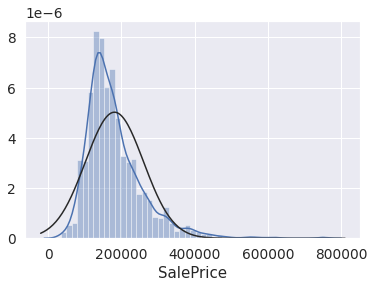

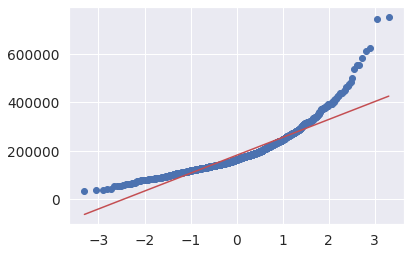

the skewness is: 1.882876
the kurtosis is: 6.536282


In [0]:
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');
(mu, sigma) = norm.fit(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("the skewness is: %f" % train['SalePrice'].skew())
print("the kurtosis is: %f" % train ['SalePrice'].kurt())

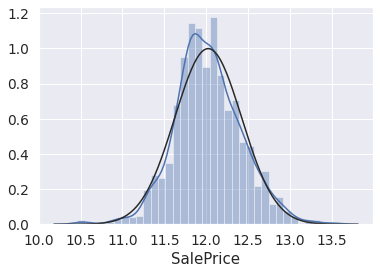

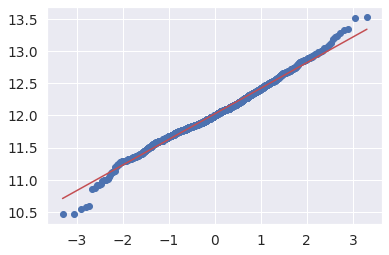

the skewness is: 0.121347
the kurtosis is: 0.809519


In [0]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');
(mu,sigma)= norm.fit(train['SalePrice']);
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()
print("the skewness is: %f" % train['SalePrice'].skew())
print("the kurtosis is: %f" % train ['SalePrice'].kurt())

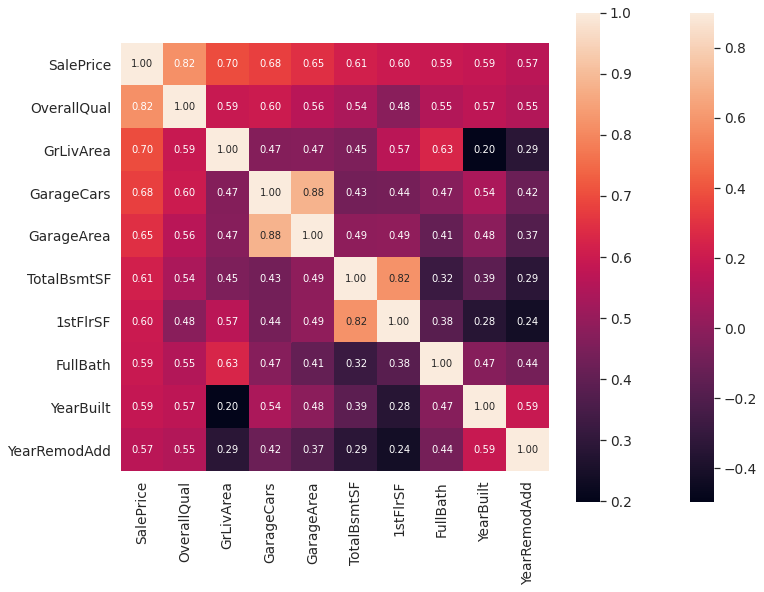

In [0]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
#plt.show();
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


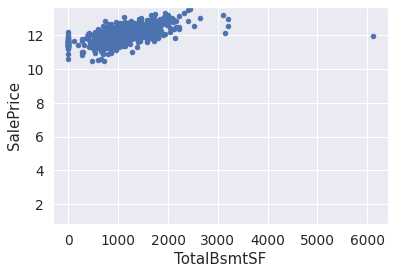

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


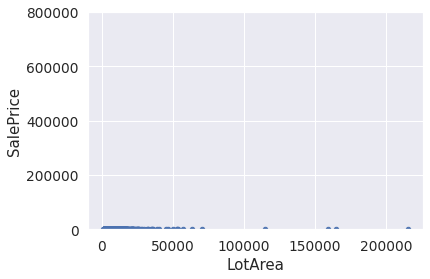

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


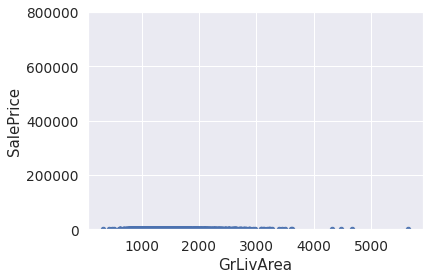

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


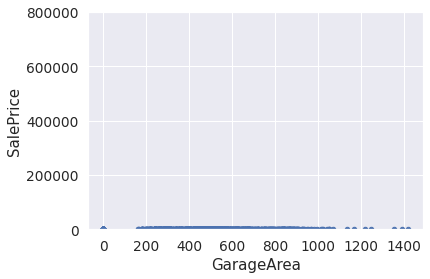

In [0]:
#scatter plots
var ='TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000);
plt.show()

var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000));
plt.show();

var ='GrLivArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

var = 'GarageArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

In [0]:
#train.head()
all_data = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)

missing_data =pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(20)

all_data size is: (2919, 79) 


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [0]:
# we are inputting the missing values for the variables
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))

In [0]:
#values for missing entries
all_data ['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna('Typ')

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] =all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data ['Exterior1st']= all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

all_data['Exterior2nd']= all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

In [0]:
# turning numeric to categorical
all_data['MSSubClass']= all_data['MSSubClass'].apply(str)
all_data['OverallCond'] =all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [0]:
#labelling categorical variables
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [0]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [0]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("skewness in the numerical features: \n")
skewness = pd.DataFrame({'Skewness' :skewed_features})   
skewness.head(7)

skewness in the numerical features: 



,Skewness
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254


In [0]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to box cox transform


In [0]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

train = all_data[:ntrain]
test = all_data[ntrain:]

(2919, 221)


In [0]:
#linear regression modelling in Lasso and gradient boosting regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [0]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.1240 (0.0165)
Gradient Boosting score: 0.1233 (0.0122)


In [0]:
class Averaging_Models(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   
averaged_models = Averaging_Models(models = (GBoost, lasso))    

score = rmsle_cv(averaged_models)
print("Averaged base models score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))

Averaged base models score(cv): 0.1185 (0.0139)


In [0]:
averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score of the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("The Accuracy score is:") 
averaged_models.score(train.values, y_train)

RMSLE score of the train data:
0.07576006971422779
The Accuracy score is:


0.9640039352546921

In [0]:
ensemble = stacked_pred *1
result = pd.DataFrame()
result['id'] = test_ID
result['SalePrice'] = ensemble
result.to_csv('final.csv', index = False)
result.head()

,id,SalePrice
0,1461,118550.075648
1,1462,154664.604177
2,1463,184839.964011
3,1464,194595.394493
4,1465,190903.460205
